# MACD & Stochastic Oscillator


## MACD - Moving average convergence divergence
<li>MACD is a lagging indicator when trading on the crossovers</li>
<li>https://www.investopedia.com/terms/m/macd.asp</li>
<li><b>Calculation:</b> Will be using default MACD parameters(12-26-9)</li>
<li>MACD = 12-Period EMA - 26-Period EMA</li>
<li>Signal Line 9-Period EMA</li>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
data = pd.read_csv("BA.csv", index_col=0, parse_dates=True) # using Boeing Corp data

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-23,178.000000,182.500000,175.419998,176.449997,176.449997,29587200
2020-07-24,175.679993,181.100006,173.600006,173.759995,173.759995,28548000
2020-07-27,173.190002,174.139999,169.000000,170.210007,170.210007,30243800
2020-07-28,168.500000,173.740005,168.229996,170.839996,170.839996,25349100
2020-07-29,172.899994,173.009995,162.250000,166.009995,166.009995,51709600


In [4]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-4.902169,-2.672019
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-6.449561,-3.427528
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,-6.777923,-4.097607
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,-6.527974,-4.583680
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-6.390971,-4.945138


<AxesSubplot:label='8d63eda3-0dad-4fe5-8d8e-708a3a8b991c'>

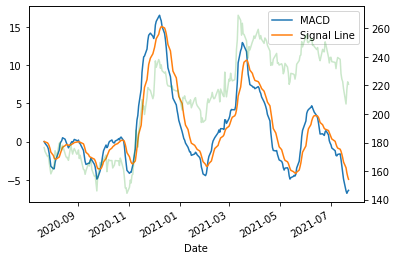

In [6]:
fig, ax = plt.subplots()
data[['MACD', 'Signal Line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

## Stochastic Oscillator
<li>Lagging Indicator</li>
<li>https://www.investopedia.com/terms/s/stochasticoscillator.asp</li>
<li>14-high: Maximum of last 14 trading days</li>
<li>14-low: Minimum of last 14 trading days</li>
<li>%K: (Last close - 14-low)*100/(14-high - 14-low)</li>
<li>%D: Simple Moving Average of %K</li>

In [7]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,%K,%D
Date,,,,,,,,,,
2021-07-16,223.110001,224.000000,217.029999,217.740005,217.740005,12388900,-4.902169,-2.672019,2.531215,3.096368
2021-07-19,211.179993,211.550003,204.800003,206.990005,206.990005,24123600,-6.449561,-3.427528,5.534502,4.762638
2021-07-20,208.100006,217.369995,206.619995,217.149994,217.149994,17009300,-6.777923,-4.097607,33.378354,13.814690
2021-07-21,219.500000,224.089996,218.899994,222.539993,222.539993,11421000,-6.527974,-4.583680,47.945919,28.952925
2021-07-22,221.520004,222.250000,218.309998,220.869995,220.869995,9754300,-6.390971,-4.945138,44.676096,42.000123


<AxesSubplot:label='fdc4ddc0-b804-4fed-9eaa-5faf1fc61502'>

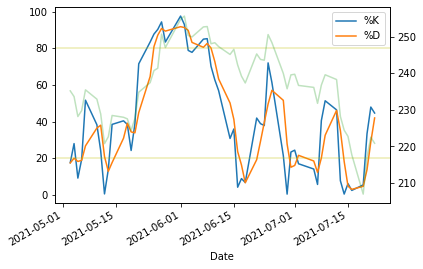

In [9]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2021-05-01':].plot(ax=ax)
ax.axhline(80, c='y', alpha=0.3)
ax.axhline(20, c='y', alpha=0.3)
data['Close'].loc['2021-05-01':].plot(ax=ax, alpha=0.3, secondary_y=True)